In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

#set seed for reproducible results
np.random.seed(414)

#gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

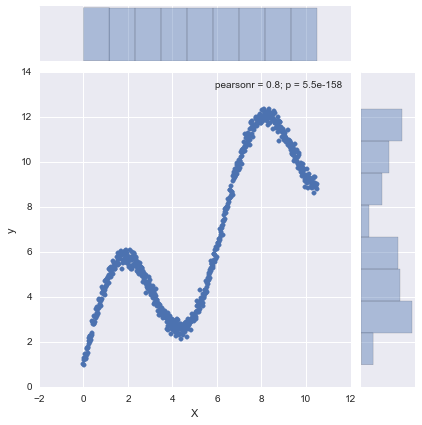

In [2]:
%matplotlib inline
import seaborn as sns

sns.jointplot('X', 'y', data = train_df)

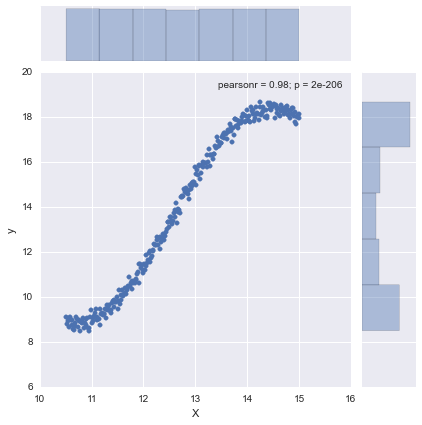

In [3]:
sns.jointplot('X', 'y', data = test_df)

In [4]:
#linear fit
poly_1 = smf.ols(formula='y ~ 1 + X', data = train_df).fit()
poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1254.
Date:                Thu, 21 Jan 2016   Prob (F-statistic):          5.52e-158
Time:                        09:38:59   Log-Likelihood:                -1483.4
No. Observations:                 700   AIC:                             2971.
Df Residuals:                     698   BIC:                             2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9959      0.152     13.104      0.000         1.697     2.295
X              0.8896      0.025     35.405      0.000         0.840     0.939
==============================================================================
Omnibus:                      701.108   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.980
Skew:                          -0.259   Prob(JB):                     3.13e-12
Kurtosis:                       1.756   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
poly_1.mse_resid

4.0683940317641403

In [6]:
poly_1_Predict_test_df = poly_1.predict(test_df)
np.mean(np.power(poly_1_Predict_test_df - test_df.y, 2))

6.547541274460983

In [7]:
import sklearn

In [8]:
test_df['predict'] = poly_1_Predict_test_df
test_df.head()

,X,y,predict
0,10.510511,9.113557,11.346053
1,10.525526,8.798065,11.359410
2,10.540541,8.931348,11.372767
3,10.555556,9.047734,11.386125
4,10.570571,8.659095,11.399482


In [9]:
from sklearn import metrics
metrics.mean_squared_error(test_df.y, test_df.predict)

6.5475412744609853

In [10]:
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data = train_df).fit()
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     694.4
Date:                Thu, 21 Jan 2016   Prob (F-statistic):          1.25e-166
Time:                        09:41:39   Log-Likelihood:                -1459.6
No. Observations:                 700   AIC:                             2925.
Df Residuals:                     697   BIC:                             2939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1458      0.221     14.261      0.000         2.713     3.579
X              0.2313      0.097      2.382      0.017         0.041     0.422
I(X ** 2)      0.0627      0.009      7.004      0.000         0.045     0.080
==============================================================================
Omnibus:                     1210.467   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.911
Skew:                          -0.091   Prob(JB):                     1.45e-11
Kurtosis:                       1.705   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
test_df['predict_quadratic'] = poly_2.predict(test_df)
test_df.head()

,X,y,predict,predict_quadratic
0,10.510511,9.113557,11.346053,12.505838
1,10.525526,8.798065,11.359410,12.529122
2,10.540541,8.931348,11.372767,12.552434
3,10.555556,9.047734,11.386125,12.575775
4,10.570571,8.659095,11.399482,12.599144


In [12]:
metrics.mean_squared_error(test_df.y, test_df.predict_quadratic)

7.98738294501364

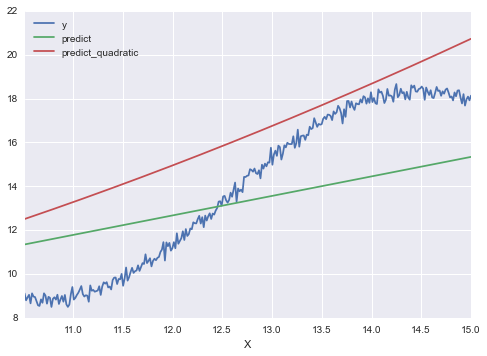

In [13]:
test_df.set_index('X').plot()

In [14]:
poly_3 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3)', data = train_df).fit()
test_df['predict_tri'] = poly_3.predict(test_df)
metrics.mean_squared_error(test_df.y, test_df.predict_tri)

199.65481044434281

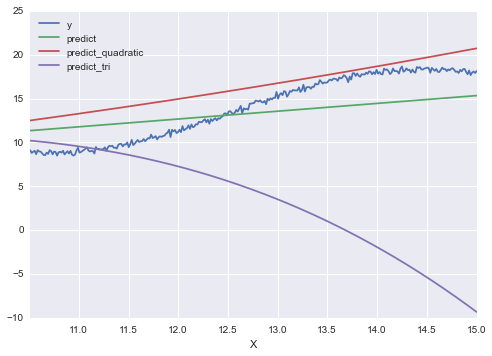

In [15]:
test_df.set_index('X').plot()